<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/wine_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
df_train=pd.read_csv('https://raw.githubusercontent.com/sreekar-pasumarthi/Deep-Learning-Projects/master/wine/wineQualityWhites.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')

The train set contain 4898 examples
The train set contain 12 features


In [0]:
df_train.head()
X_train = df_train.drop('quality', axis = 1)
y_train = df_train['quality']

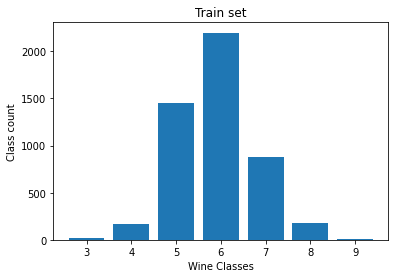

In [5]:
whitewine_classes= y_train.unique()
values = y_train.value_counts()#occurrence of each class

plt.bar(whitewine_classes, values)
plt.title('Train set')
plt.xlabel('Wine Classes')
plt.ylabel('Class count')
plt.show()
#As you can see the number of instances of each class is highly disproportionate hence we need to shuffle the data and split it using K-fold. 

In [6]:
X_train.describe()
#we need to normalise data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [7]:
X_train = df_train.values #to convert it to array and then normalise
X_train = normalize(X_train)#rescaling the data between 0 and 1
print(X_train[0])

[3.94240529e-02 1.52064204e-03 2.02752272e-03 1.16582557e-01
 2.53440340e-04 2.53440340e-01 9.57441285e-01 5.63763957e-03
 1.68960227e-02 2.53440340e-03 4.95616665e-02 3.37920454e-02]


In [8]:
y_train = to_categorical(y_train)#to convert y_train into to 'one hot vector'
y_train.shape

(4898, 10)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=12, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [12]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=500, batch_size=100, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 87.34% (3.60%)
